In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# manuscritos
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregamento e Pré processamento dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# redimensionado a imagem
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

#  Normalização: converte os valores dos pixels de 0-255 para 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# one hot enconding: converte rotuloos em representação binário para 10 classes
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


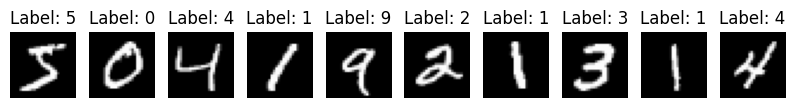

In [6]:
def plot_image(x, y, samples=10):
  plt.figure(figsize=(10, 4))
  for i in range(samples):
    plt.subplot(1, samples, i + 1)
    plt.imshow(x[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(y[i])}')
    plt.axis('off')
  plt.show()

plot_image(x_train, y_train)

# Arquitetura do Modelo


*   Modelo sequencial: as camadas são   
    empilhadas para formar uma rede
*   Camadas convolucionais: extraem
    caracteristicas das imagens, a primeira camada tem 32 filtros a segunda 64
*   maxPooling2D: reduz a          dimensionalidade da saídas das camada convolucionais

* flatten: transforma  matriz 2D em vetor 1D
* camadas densas: uma camada densa de 128 neurônios seguida por dropout para evitar overfitting e a camada com saida com softmax para prever 10 classes


* dropout: taxa de dropout 0.5 para evitar overfitting

In [16]:
model = Sequential([
    # camada convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    # camada 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    # camada de flatten
    Flatten(),
    # camada densamennte ligada
    Dense(64, activation='relu'),
    # camada de saida 10 (números de 0 a 9)
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Treinando o Modelo


*   fit: treina o modelo com os dados de
    treinamento e validação

*   epochs: O número de epocas é    
    ajustavel

*   batch_size:  O tamanho do lote



In [17]:
history = model.fit(x_train, y_train, epochs=10,batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.8698 - loss: 0.4157 - val_accuracy: 0.9839 - val_loss: 0.0500
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9830 - loss: 0.0572 - val_accuracy: 0.9869 - val_loss: 0.0417
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9898 - loss: 0.0336 - val_accuracy: 0.9869 - val_loss: 0.0388
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9918 - loss: 0.0264 - val_accuracy: 0.9879 - val_loss: 0.0360
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9930 - loss: 0.0229 - val_accuracy: 0.9889 - val_loss: 0.0347
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9891 - val_loss: 0.0404
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9900 - val_loss: 0.0324
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9974 - loss: 0.0084 - 

# Avaliação do Modelo

In [19]:
loss = history.history['loss']
acc = history.history['accuracy']

print(f'Loss: {loss[-1]:.2f}')
print(f'Acc: {acc[-1]:.2f}')

Loss: 0.01
Acc: 1.00
